<a href="https://colab.research.google.com/github/Malikarbaaz/Malik-Hotel-booking-EDA-/blob/main/Malik_Arbaaz_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv'

In [ ]:
# Reading our Dataset
data = pd.read_csv(file_path)

In [ ]:
# head gives the top 5 rows of our dataset
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Creating a copy of dataframe 
df = data.copy()

## **Here we creating a copy of dataframe because whatever we applying a conditions on new data so that it doesn't affect our original dataset.**

In [ ]:
#  Shape give the total number of rows and columns
print('Rows {}  Columns {}'.format(data.shape[0], data.shape[1]))

Rows 119390  Columns 32


In [ ]:
# describe() gives the overall descriptive summary of the dataframe
df.describe(include= 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
#info() print the basic information of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# lets check the total null values in our dataset.
# .sort_values sorting the dataset in ascending order and if you want to make it reverse just write False in bracket.
df.isna().sum().sort_values(ascending = False) 

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [ ]:
# Since 'agent' and 'company' contain maximum number of null values so dropping these columns won't affect our data.
df = df.drop(['agent','company'],axis =1)

In [ ]:
# first we have 32 columns and now by removing 2 columns we see that there are total 30 columnns in dataset
df.shape

(119390, 30)

### **Aslo we see that there are some null values in our dataset so we have to drop those null values so that our data become more proper.**

In [ ]:
# Checking the totol number of duplicate values in our data 
len(df[df.duplicated()])
# df[df.duplicated()].shape

31984

In [ ]:
# dropping all the missing values of our dataset 
df = df.dropna()

In [ ]:
# Dropping the duplicate values
df = df.drop_duplicates()
df.shape

(86914, 30)

In [ ]:
# Checking every column has similar rows by using count() function
df.count()

hotel                             86914
is_canceled                       86914
lead_time                         86914
arrival_date_year                 86914
arrival_date_month                86914
arrival_date_week_number          86914
arrival_date_day_of_month         86914
stays_in_weekend_nights           86914
stays_in_week_nights              86914
adults                            86914
children                          86914
babies                            86914
meal                              86914
country                           86914
market_segment                    86914
distribution_channel              86914
is_repeated_guest                 86914
previous_cancellations            86914
previous_bookings_not_canceled    86914
reserved_room_type                86914
assigned_room_type                86914
booking_changes                   86914
deposit_type                      86914
days_in_waiting_list              86914
customer_type                     86914


### **After dropping column, dropping the missing values and drop duplicates we can see that every column has same number of rows and there is no null values in our dataset.**

## Data Visualization with respect to Hotel Booking Analysis.
###**Q1. What are the types of hotel? What type of Hotels does a customer book in general?**

###**Q2. Which is the busiest month of the Hotel ?**

###**Q3. Countries with Highest bookings**

###**Q4. How cancellations vary according to month and which type of hotel has highest number of cancellation?**

###**Q5. Which meals were customer prefer the most?**

###**Q6. Relation between repeated customer and cancellation.**

###**Q7. Whether the guest stay in over a weekend or weekday.**

###**Q8. Bookings by market segment and distribution channel.**

###**Q9. Exploring Number of Special Requests.**

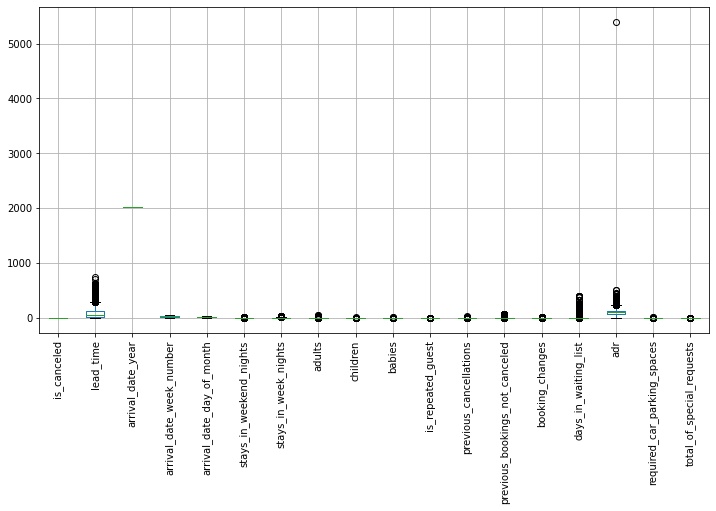

In [ ]:
# plotting boxplot 
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation = 90)   # by using xticks we rotate our column labels to 90 degree.
plt.show()

### **We use boxplot to understand how many outliers are there in our data and we see that there are lots of outliers even the boxplot is not clear.**

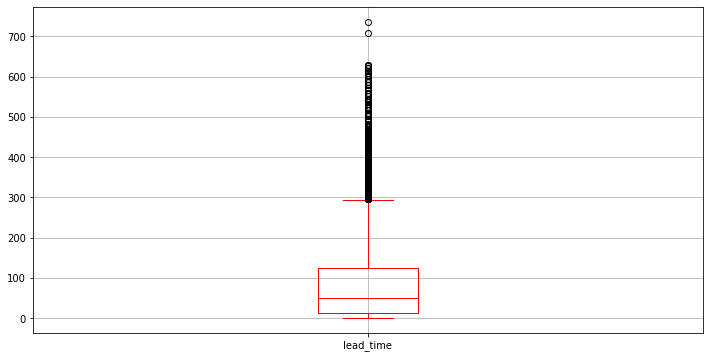

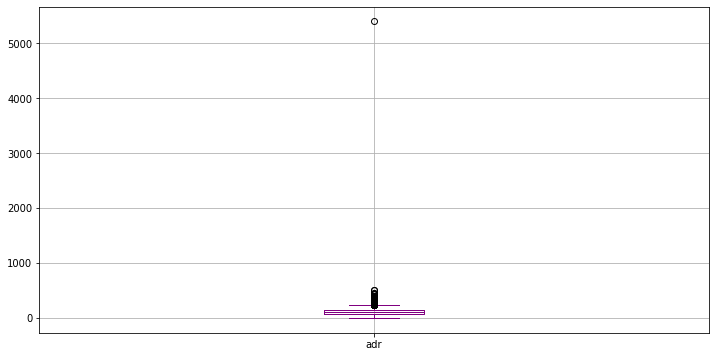

In [ ]:
# plotting boxplot to find outliers for some columns
# plot for lead_time variable
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
df.boxplot(column = ['lead_time'], color="red", ax = ax)
plt.show()


# plot for adr variable
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
df.boxplot(column = ['adr'], color="purple", ax = ax)
plt.show()

### **We now individually potting the boxplot for some column to see that how many outliers are there in the dataset.**

* In lead_time there are so many outliers and,
* In adr column this seems to have few outliers in the data.

### **in order to drop the outliers here we using IQR to finding out how many outliers are there to drop them.**

In [ ]:
#Dropping outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('International Quartile Range =\n',IQR)

#Dropping Outliers for specific columns
dror_outlier = ['lead_time','adr']
df = df[~((df[dror_outlier] < (Q1 - 1.5*IQR)) | (df[dror_outlier] > (Q3 + 1.5*IQR))).any(axis=1)]

International Quartile Range =
 is_canceled                         1.00
lead_time                         113.00
arrival_date_year                   1.00
arrival_date_week_number           21.00
arrival_date_day_of_month          15.00
stays_in_weekend_nights             2.00
stays_in_week_nights                3.00
adults                              0.00
children                            0.00
babies                              0.00
is_repeated_guest                   0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
booking_changes                     0.00
days_in_waiting_list                0.00
adr                                61.85
required_car_parking_spaces         0.00
total_of_special_requests           1.00
dtype: float64


##**PROBLEM STATEMENT :**
## Q1. What are the types of hotel?  What type of Hotels does a customer book in general?

Types of hotel are ['Resort Hotel' 'City Hotel'].
City Hotel      51386
Resort Hotel    30593
Name: hotel, dtype: int64
Index(['City Hotel', 'Resort Hotel'], dtype='object')


<Figure size 576x360 with 0 Axes>

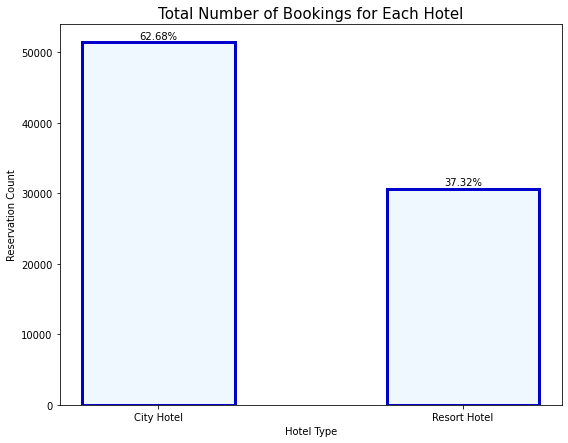

In [ ]:
# get types of hotel
types_of_hotel = df.hotel.unique()
print(f"Types of hotel are {types_of_hotel}.")

hotel_list = df['hotel'].value_counts()           # gives total value of City hotel and Resort Hotel
hotel_count = df['hotel'].value_counts().index     # gives the values index of the hotel

print(hotel_list)     
print(hotel_count)  

# setting the size of graph  
plt.figure(figsize = (8,5))

# creating the bar graph
fig, ax = plt.subplots(figsize = (9,7))
plt.bar(hotel_count, hotel_list, color ='aliceblue', width = 0.5, edgecolor = 'mediumblue',lw =3)
plt.title('Total Number of Bookings for Each Hotel', size =15)
plt.xlabel('Hotel Type')
plt.ylabel('Reservation Count')
for p in ax.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

# conclusion
**From above graph there are 2 types of Hotel** 

**1. City Hotel having count approx 51000 and,**

**2. Resort Hotel having count 30000 approx respectively.**

**3. The above graph says that approximately 37% of the reservations were booked for Resort hotel and 63% were booked for City Hotel.**

**4. It means that people mostly refer City Hotel as compared to Resort Hotel.**

## Q2. Which is the busiest month of the Hotel ? 

hotel,arrival_date_month,City Hotel,Resort Hotel
0,April,4942,2772
1,August,6175,3319
2,December,2933,2018
3,February,3568,2425
4,January,2695,1904
5,July,5380,3682
6,June,4770,2473
7,March,4802,2572
8,May,5099,2787
9,November,2897,2005


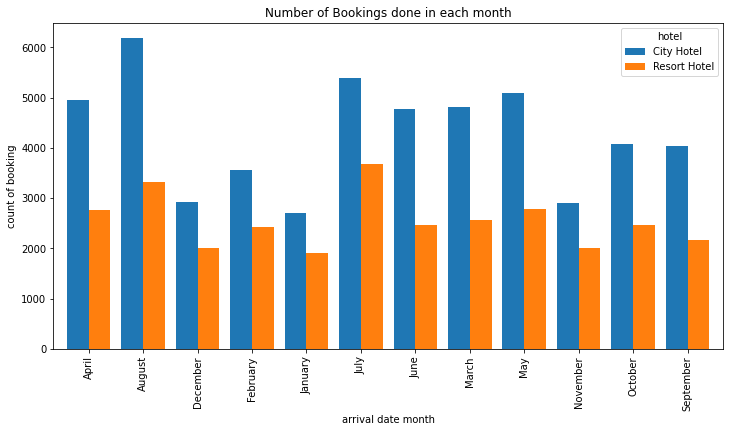

In [ ]:
# busy month for city and resort hotel
busy_month = df.groupby(['arrival_date_month', 'hotel']).size().unstack()
busy_month.plot.bar(title = 'Number of Bookings done in each month' , xlabel = 'arrival date month' , ylabel = 'count of booking' , figsize = (13,7),width=0.8)
busy_month.reset_index()

# conclusion
* **From above graph we can say that in the month of August, July and May the number of bookings are highest for city hotel.**

* **In Resort as well, the number of bookings are highest in the month of August and July and thatswhy August, July and May is called the busiest month of the year.**

##**Let see more better visualization of busiest month by using Heatmap.**

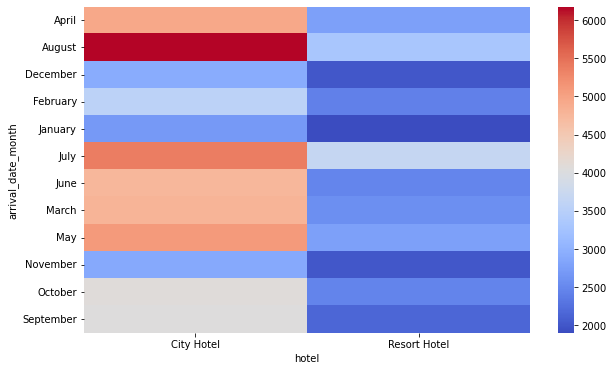

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap='coolwarm') #The purpose of using Heat Maps is to better visualize the volume of locations/events within a dataset

##conclusion
* **Here i am using heatmap to provide the relation between arrival_date_month and hotel. This gives us an onsight that which are the busiest month of the hotel.**

* **The red color says that highest booking followed by City hotel is the month of August, after that July, May, April,etc.**

* **However in Resort hotel the only busiest month seems to be August followed by July, the rest of the month do not shows the huge number of hotel booking.**

##Q3. Countries with Highest bookings

   Country  number_of_bookings  Percentage
0      PRT               25777   33.803242
1      GBR                9568   12.547209
2      FRA                8546   11.206987
3      ESP                6740    8.838649
4      DEU                5131    6.728651
5      ITA                2953    3.872482
6      IRL                2836    3.719052
7      BEL                2005    2.629301
8      BRA                1912    2.507344
9      NLD                1857    2.435218
10     USA                1751    2.296213
11     CHE                1491    1.955256
12      CN                1028    1.348091
13     AUT                 914    1.198594
14     SWE                 805    1.055655
15     CHN                 800    1.049098
16     POL                 729    0.955990
17     RUS                 519    0.680602
18     NOR                 460    0.603231
19     ROU                 434    0.569136


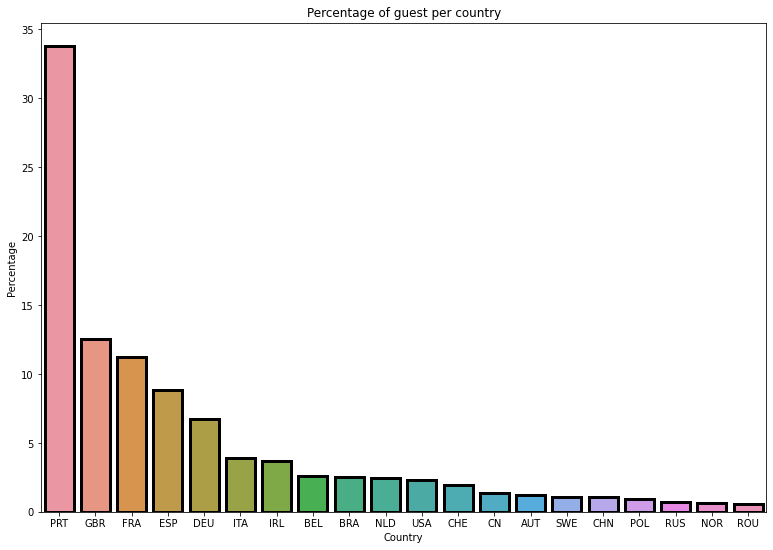

In [ ]:
#value_counts will count the values of column, reset_index will sort index according to highest to lowest and renaming the index.
country_bookings = df['country'].value_counts()[:20].reset_index().rename(columns = {'index':'Country','country':'number_of_bookings'})

#adding percentage column
country_bookings['Percentage'] = (country_bookings['number_of_bookings']/country_bookings['number_of_bookings'].sum())*100
print(country_bookings)


# lets plot the graph
plt.figure(figsize=(13,9))
sns.barplot(x="Country", y="Percentage", data=country_bookings, edgecolor = 'black',lw=3).set(title='Percentage of guest per country')
plt.show()

## conclusion
* **In above code we call country column and uses function value_counts which count the total values and in that we uses slicing technique so that we only want top 20 countries.**
* **reset_index in pandas is used to reset index of the dataframe object to default indexing and by using rename function we rename the column name index as Country and country as number_of_bookings.**
* **We also add percentage column so that it gives the accurate percentage of all the countries.**
* **As graph clearly shows that PRT i.e Portugal is the country with maximum percentage of bookings followed by GBR, FRA etc. from Top 20 Countries.**  

##Q4. How cancellations vary according to month and which type of hotel has highest number of cancellation?

In [ ]:
# Replace the values of 0 and 1 with string values for better understanding.
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])

is_canceled         canceled  not_canceled
arrival_date_month                        
April                   2331          5383
August                  2898          6596
December                1296          3655
February                1390          4603
January                 1015          3584
July                    2779          6283
June                    2120          5123
March                   1780          5594
May                     2236          5650
November                1022          3880
October                 1542          5008
September               1495          4716


Text(0.5, 1.0, 'Hotel with highest number of cancellation')

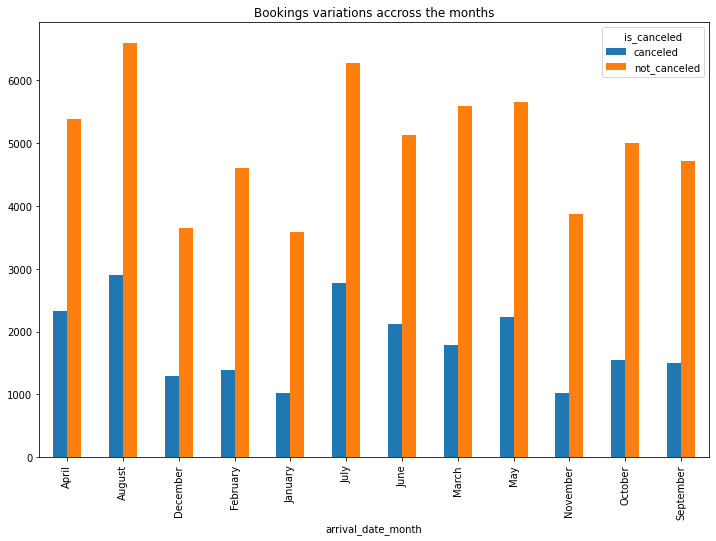

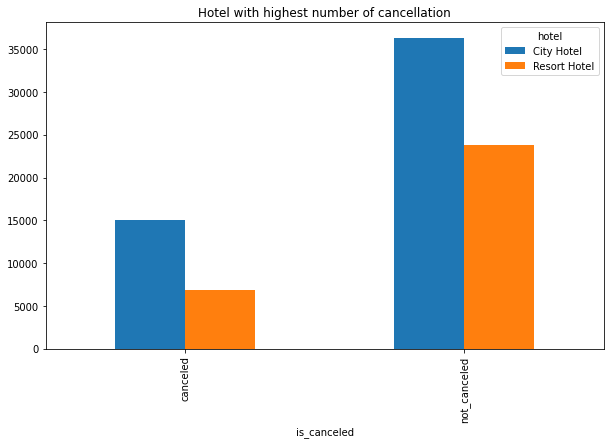

In [ ]:
# Here we groupby arrival_date_month with is_canceled to get booking variations accross the months 
vary_month = df.groupby('arrival_date_month')['is_canceled'].value_counts().unstack()  # stored in a new variable i.e vary_month
vary_month.plot(kind='bar',figsize = (12,8))
plt.title('Bookings variations accross the months')
print(vary_month)

# plot the graph for highest number of canceled bookings
canceled_hotel = df.groupby(['is_canceled','hotel']).size().unstack()
canceled_hotel.plot(kind = 'bar',figsize = (10,6))
plt.title('Hotel with highest number of cancellation')

## conclusion
* **For 'is_canceled' column :- we replace O with 'not_canceled' and 1 with 'canceled'.**
* **In above code we groupby arrival_date_month with is_canceled and take out it values by calling value_counts function. We stored this in new variable vary_month and print that variable.**
* **From graph 1 we came up from a conclusion that August is the month with maximum cancellations followed by July, May,June and April with lowest cancellations in January.**
* **From graph 2 we can say that most of the people were not canceled his bookings, only few were canceled in which City hotel has more number of cancellation as compared to Resort hotel.**

##Q5. Which meals were customer prefer the most?

BB           78.307859
SC           11.417558
HB            9.373132
Undefined     0.547701
FB            0.353749
Name: meal, dtype: float64


Text(0, 0.5, 'Count of booking')

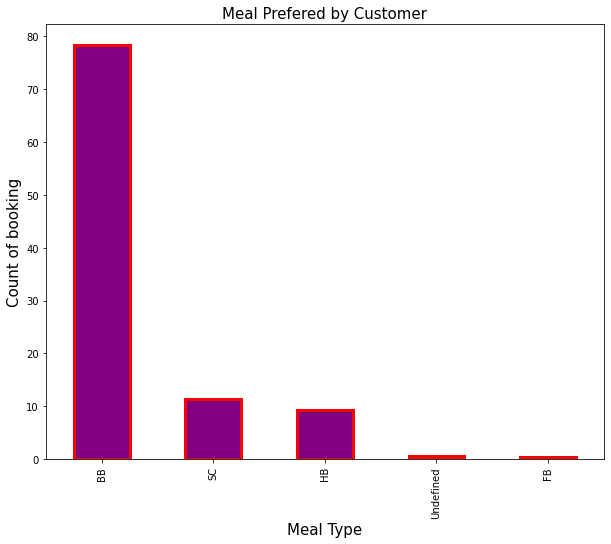

In [ ]:
# preferred type of meal

preferred_meal = df.meal.value_counts(normalize=True)*100     # this line give the values in percentage
print(preferred_meal)

#plotting the Graph
plt.figure(figsize=(10,8))
preferred_meal.plot(kind='bar', color ='purple', edgecolor ='red', lw = 3)
plt.title('Meal Prefered by Customer', size =15)
plt.xlabel('Meal Type',size=15)
plt.ylabel('Count of booking',size =15)

## conclusion
* **Here i am calling the meal column from dataset and apply condition value_counts(normalize=True)*100 means we want the values in percentage and stored in a new variable preferred_meal.**
* **By seeing graph we can clearly say that most preferrable meal BB i.e Bed and Breakfast with approximate 78% and followed by SC(Super Combo),HB(Half Baked).**
* **Very less preferrable meal is FB i.e Full Breakfast and Undefined i.e no meal package.**

##Q6. Relation between repeated customer and cancellation.

Text(0.5, 1.0, 'Relation between repeated customer and cancellation')

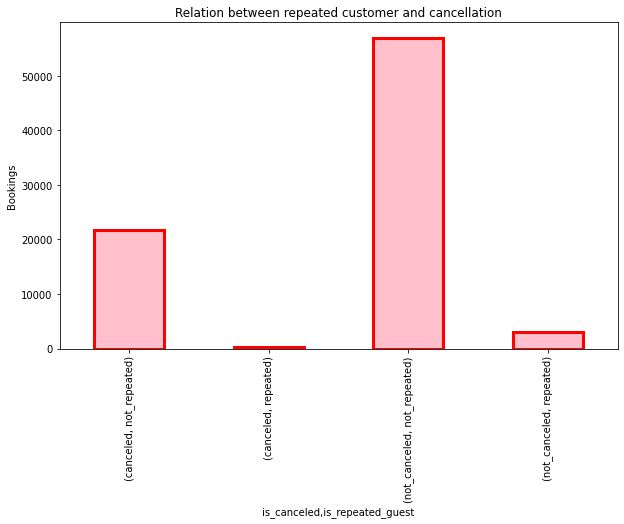

In [ ]:
# again the same step by replacing 1,0 of is_canceled and is_repeated_guest to string values.
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
df['is_repeated_guest'] = df.is_repeated_guest.replace([1,0], ['repeated', 'not_repeated'])

#Plotting graph
df=df.groupby(['is_canceled','is_repeated_guest']).size()
df.plot(kind='bar', color ='pink', edgecolor ='red', lw = 3, figsize = (10,6));
plt.ylabel('Bookings')
plt.title('Relation between repeated customer and cancellation')

## conclusion
* **The feature 'is_canceled' and 'is_repeated_guest' have values 0 and 1.**
 * For 'is_canceled' :- 0 stands for 'not_canceled' and 1 stands for 'canceled'.
  * For 'is_repeated_guest' :- 0 stands for 'not_repeated' and 1 stands for 'repeated'*
* **It is important to find out whether the hotel booking is cancelled and whether the customer is repeated guest or not.**

* **We see that when the hotel booking is cancelled and customer is a repeated guest then entry is almost zero which means that repeated guest is less likely to cancelled his booking.**
* **And from graph we say that there is a highest number of booking which were not cancelled and customer is not a repeated guest.**

##Q7. Whether the guest stay in over a weekend or weekday.

Text(0.5, 1.0, 'Stay on weekday nights')

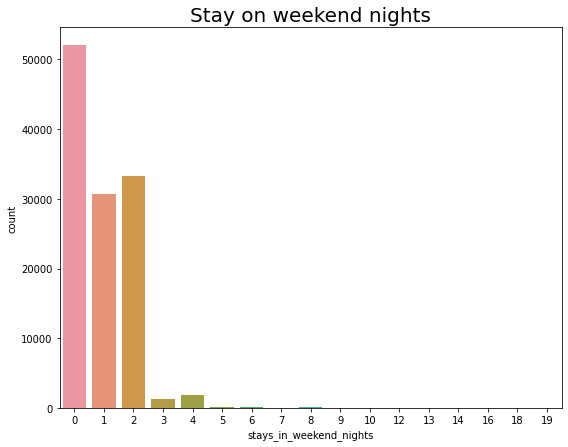

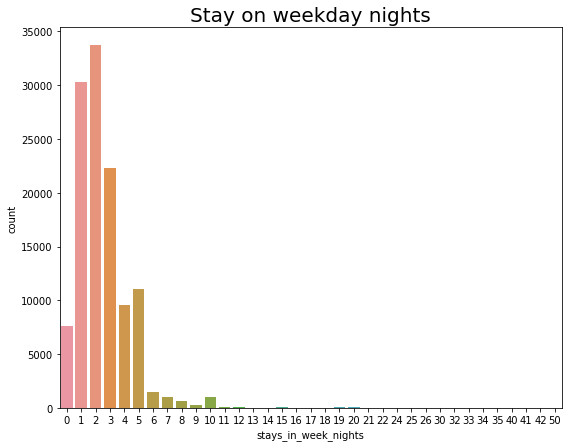

In [ ]:
#plot graph for column Stay on weekend nights
plt.figure(figsize=(9,7))
sns.countplot(data = data, x = 'stays_in_weekend_nights').set_title('Stay on weekend nights', fontsize = 20)

#plot graph for Stay on weekday nights
plt.figure(figsize=(9,7))
sns.countplot(data = data, x = 'stays_in_week_nights' ).set_title('Stay on weekday nights' , fontsize = 20)

## conclusion
* **From both graph it seems that majority of the guest stays are over the weekday's night.**
* **Most of the guest stay in weekdays for around 0,1,2,3,4 and 5 nights and,**
* **Most of the guest stay in weekends for 0,1 and 2 nights respectively.**

##Q8. Bookings by market segment and distribution channel.

In [ ]:
data.market_segment.value_counts(normalize=True)*100      # here I am using my original 'data' variable 

Online TA        47.304632
Offline TA/TO    20.285619
Groups           16.593517
Direct           10.558673
Corporate         4.435045
Complementary     0.622330
Aviation          0.198509
Undefined         0.001675
Name: market_segment, dtype: float64

In [ ]:
data.distribution_channel.value_counts(normalize=True)*100

TA/TO        81.975040
Direct       12.266521
Corporate     5.592596
GDS           0.161655
Undefined     0.004188
Name: distribution_channel, dtype: float64

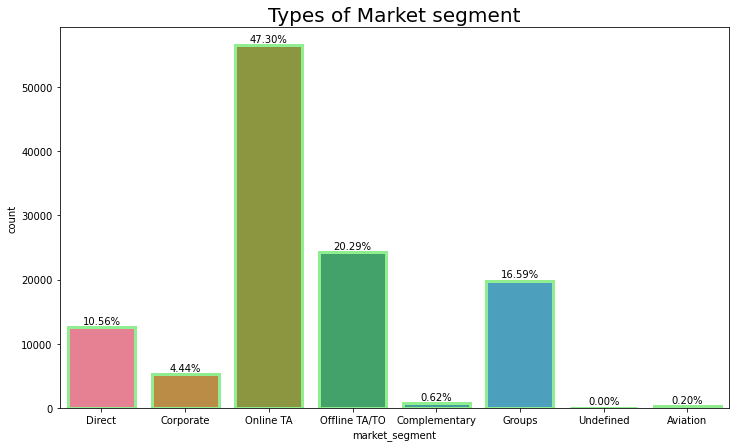

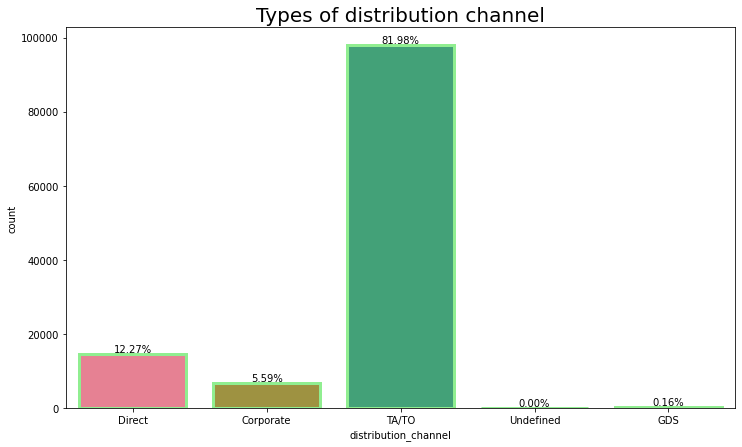

In [ ]:
#plotting graph for market segment
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(data['market_segment'], palette='husl',edgecolor = 'lightgreen', lw=3).set_title('Types of Market segment', fontsize = 20)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/data.shape[0]*100),ha = "center")
plt.show()


#plotting graph for distribution channel
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(data['distribution_channel'],palette='husl',edgecolor = 'lightgreen', lw=3).set_title('Types of distribution channel', fontsize = 20)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/data.shape[0]*100),ha = "center")
plt.show()

## conclusion
* **In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators.**

* **Majority of the distribution channels and market segments involve travel agencies (online or offline).**
* **Through market segment TA(online) and TA/To(offline) segments round 47.30% & 20.29% and through distribution channel  TA/To segments round 81.98% respectively.**

##Q9. Exploring Number of Special Requests.

In [ ]:
data['total_of_special_requests'].value_counts(normalize = True).reset_index().rename(columns = {'index':'count','total_of_special_requests':'Special requests in %'}) 

,count,Special requests in %
0,0,0.588977
1,1,0.278298
2,2,0.108627
3,3,0.020915
4,4,0.002848
5,5,0.000335


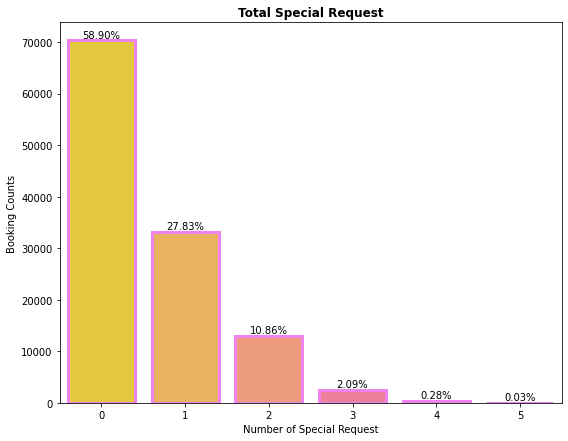

In [ ]:
# potting graph for special requests
fig, ax = plt.subplots(figsize = (9,7))
sns.countplot(x='total_of_special_requests', data=data, palette = 'spring_r',edgecolor = 'violet', lw=3)
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Booking Counts')

for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/data.shape[0]*100),ha = "center")

## conclusion
* **From the above graph around 58.9% bookings do not have any special requests from the guests.**
* **For one day 27.8% bookings have a special request from the guests.**
* **There are around 10.86% and 2.09% bookings for two and three days.**
* **And we can say that very less number of guest book a special request for four and five days i.e 0.28%, 0.03%.**

##Summary
**1. We see that majority of the hotels booked are City hotel, we should need to spend the most targeting fund on these hotels.**

**2. Most of the bookings were made from July to August, so these months are peak in business expansion and need to look after more customer satisfaction.**

**3. Portugal, Great Britain, France, Spain are the list of top countries where most of the guest come from.**

**4. As seen above City hotel has highest number of cancellation, so according to hotel point of view the cancellation should be reduce by applying non refundable charges, so it might be directly affect to guest so there is a possibility that cancellation should be reduced.**

**5. We see that from graph we have very less repeated guests, so we should target our advertisement on these guests by offering special discounts to increase the returning guests.**

**6. Also hotels should consider maximum number of special requests from guests because it will to reduce the possibility of cancellations which will evantually help in better customer experience for the guest.**